# Multiple Subplots

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## ``plt.axes``: Subplots by Hand

* 我們可以自己畫出兩個 axes

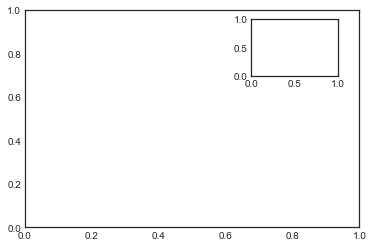

In [2]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2]) # [left, bottom, width, height]

* 這邊解釋一下， [left, bottom, width, height] = [0.65, 0.65, 0.2, 0.2] 的意思
* 在一張圖中，左下角在座標系統是 (0,0)，所以 left 和 bottom，就像是座標系的 x 和 y 的意思。至於 widht 和 height，是指從新圖的 (x,y)開始算，要往右多寬，往上多高的意思

* 對應到 oop，我們可以用 `add_axex` 的指令來新增 axes。例如，我要建立2個垂直堆疊的 axes

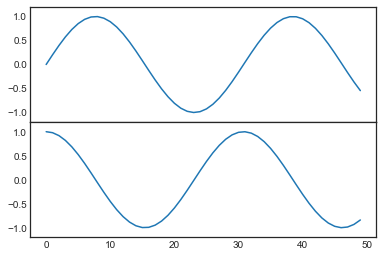

In [3]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

* 可以看到，這張圖經過巧妙的設計：  
  * 下面那個 pannel，y從 0.1開始，height又是 0.4，所以圖的最上面，剛好到 0.5
  * 上面那個 pannel，就讓他從 bottom = 0.5 開始畫。然後，再把他的 xticklabels 拿掉，那兩張圖就疊在一起了

## `plt.subplot`: 用 grid 來畫圖

* 用 `plt.subplot(幾列, 幾欄, 這張圖是第幾張圖)` 來規定好，現在這張圖所在的 grid 的位子
* 把圖片塞進格子時，都是 byrow 的塞
* 舉例來說，我如果想畫出 2x3 的 grid，然後把圖片畫進去，我可以這樣做

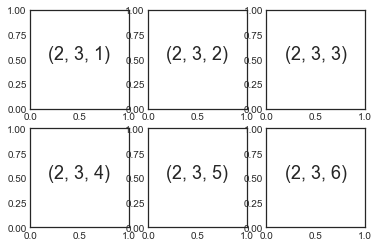

In [4]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

* The command `plt.subplots_adjust` 可以用來調整間距. 
* 剛剛的做法，是 `plt.subplot()`，那如果是用 oop，對應的寫法就是 `fig.add_subplot()`

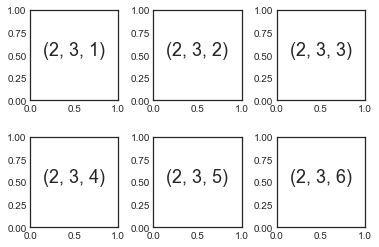

In [5]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4) # height 的 space 是子圖形的 40%, width 的 space 也是 40%
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

## `plt.subplots`: 一次準備好整個網格

* 我們剛剛是用 for 迴圈，在每個回圈中，都要寫 `plt.subplot(幾列, 幾欄, 這是第幾個圖)` 來一張一張的做出格子和畫圖。
* 那這還蠻煩的，如果你的格子點非常規律，那我可以用 `plt.subplots()` 直接一次做完就好。
* 我們接下來要建立一個 2x3 的子圖表，然後我要他們 share x 軸 和 y 軸，作法如下：

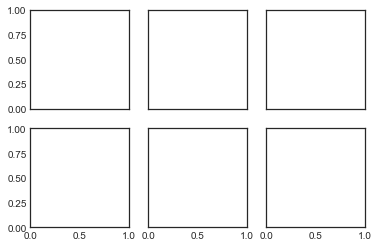

In [6]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

* 可以看到，當你 `srarex` 和 `sharey` 後，就自動移除不必要的刻度和label了。
* 那現在的 `ax` 物件，他已經是個二維陣列，所以我們可以用 for 回圈，依序加入我要的圖：

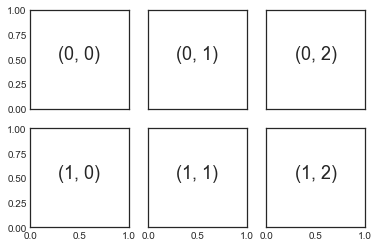

In [7]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

* 可以看到，比起 `plot.subplot()`，現在的 `plt.subplots()` 更符合 python 的以 0 為基底的索引慣例

## `plt.GridSpec`: unregular grid

* 直接看範例

In [8]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

* 現在這個 grid，他就是個二維list，layout 長成 2x3 的樣子

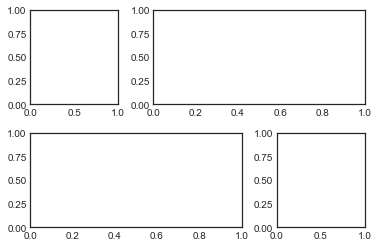

In [9]:
plt.subplot(grid[0, 0]) # grid 的 0,0 就是右上角的格子
plt.subplot(grid[0, 1:]) # grid 的 0, 1~2，就是格子的 (0,1) 和 (0,2) 這兩格都給他
plt.subplot(grid[1, :2]) # grid 的 (1,0) 和 (1,1) 都給他
plt.subplot(grid[1, 2]); # grid 的 (1,2) 給他

* 實際的應用如二維散布圖，然後margin我想畫 histogram

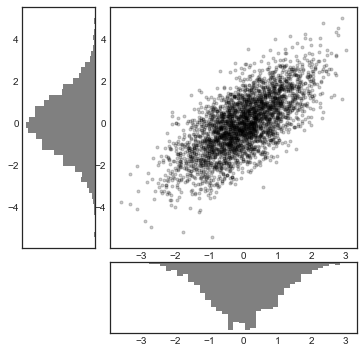

In [10]:
# 先生成資料(二維常態)
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

* 其實，這種圖，在 seaborn 中很好畫，不用這麼累，晚點就會介紹了